In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

ARQ = '../data/processed/imdb_top_250_limpo.csv'

df = pd.read_csv(ARQ,
                        sep = ';',
                        decimal = ',',
                        encoding = 'latin1'
)

df.head()

,titulo,ano,nota,sinopse,diretor,elenco_principal
0,Um Sonho de Liberdade,1994,9.3,Dois homens presos se reúnem ao longo de vário...,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton"
1,O Poderoso Chefão,1972,9.2,O patriarca idoso de uma dinastia do crime org...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan"
2,Batman: O Cavaleiro das Trevas,2008,9.1,Agora com a ajuda do tenente Jim Gordon e do p...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart"
3,O Poderoso Chefão: Parte II,1974,9.0,O início da vida e da carreira de Vito Corleon...,Francis Ford Coppola,"Al Pacino, Robert de Niro, Robert Duvall"
4,12 Homens e uma Sentença,1957,9.0,O julgamento de um assassinato em Nova Iorque ...,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam"


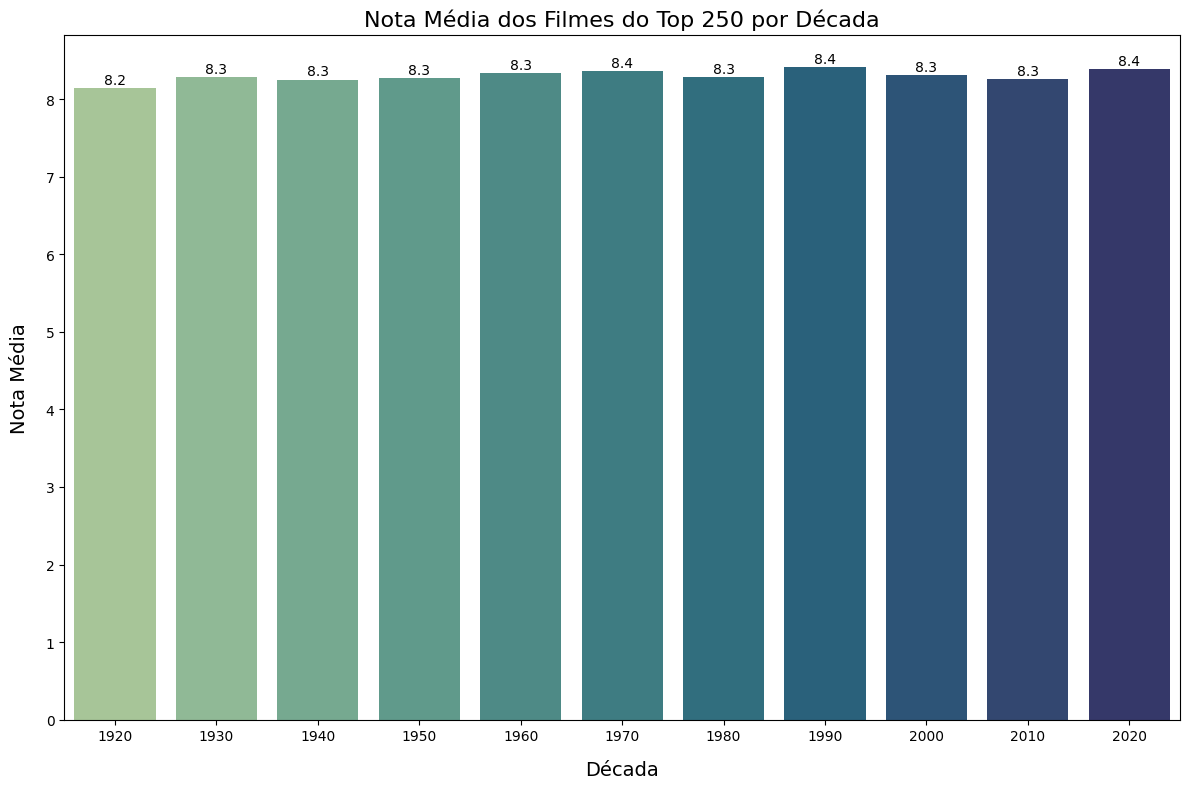

In [3]:
# Criando a coluna 'decada'
df['decada'] = (df['ano'] // 10) * 10

# Agrupando por década e calculando a nota média
media_por_decada = df.groupby('decada')['nota'].mean().reset_index()

plt.figure(figsize=(12,8))
grafico = sns.barplot(x='decada', y='nota', data=media_por_decada, hue= 'decada', palette = 'crest', legend=False)

for container in grafico.containers:
    grafico.bar_label(container, fmt='{:,.1f}', padding=0.8)

plt.title('Nota Média dos Filmes do Top 250 por Década', fontsize=16)
plt.xlabel('Década', labelpad = 12, fontsize = 14)
plt.ylabel('Nota Média', labelpad = 12, fontsize = 14)
plt.tight_layout() 
plt.show()

In [10]:
# Agrupando por diretor para calcular a média de nota e contagem de filmes
stats_diretores = df.groupby('diretor')['nota'].agg(['mean', 'count']).reset_index()

# Filtrando para diretores com 2 ou mais filmes na lista para uma análise mais justa
diretores_relevantes = stats_diretores[stats_diretores['count'] >= 2].sort_values(by='mean', ascending=False)

# Pegando os nomes e a contagem de filmes do nosso Top 5
top_5_diretores = diretores_relevantes.head(5)
print('Top 5 Diretores por Nota Média (com 2+ filmes):')
print(top_5_diretores)

Top 5 Diretores por Nota Média (com 2+ filmes):
                  diretor      mean  count
44         Frank Darabont  8.950000      2
112         Peter Jackson  8.900000      3
42   Francis Ford Coppola  8.866667      3
122       Robert Zemeckis  8.650000      2
19      Christopher Nolan  8.550000      8


In [5]:
# Nomes dos top 5 diretores
labels_top_5 = top_5_diretores['diretor'].tolist()

# Contagem de filmes de cada um do top 5
sizes_top_5 = top_5_diretores['count'].tolist()

# Total de filmes do top 5
total_filmes_top_5 = sum(sizes_top_5)

# Total de filmes na lista
total_filmes_geral = len(df) # Isso deve ser 250

# Contagem de filmes de outros diretores
outros_filmes = total_filmes_geral - total_filmes_top_5

# Juntando os dados para o gráfico
labels_grafico = labels_top_5 + ['Outros']
sizes_grafico = sizes_top_5 + [outros_filmes]


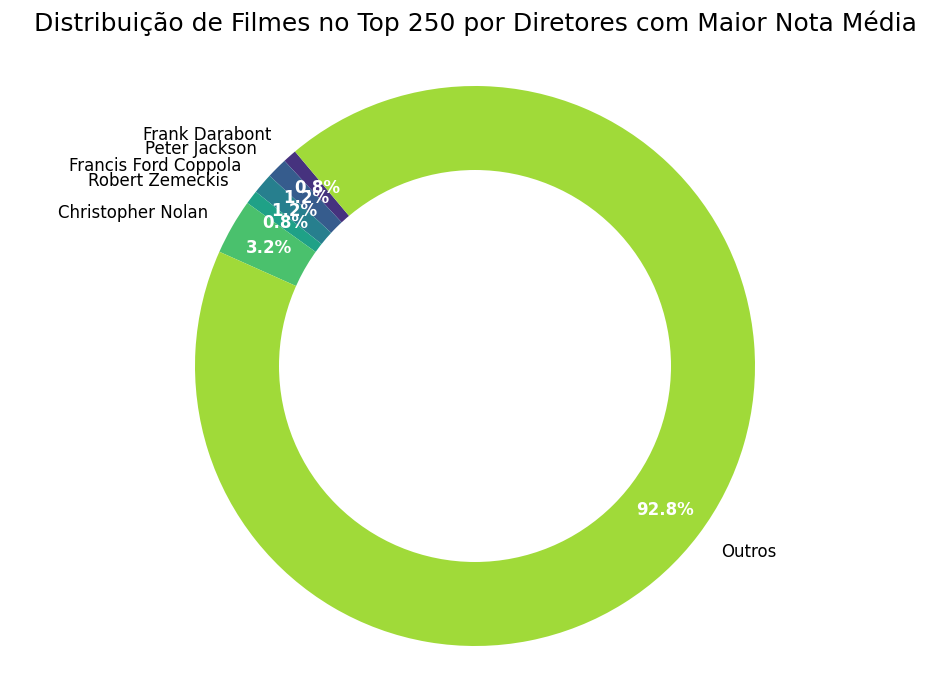

In [6]:
plt.figure(figsize=(12, 8))

wedges, texts, autotexts = plt.pie(
    sizes_grafico, 
    labels=labels_grafico, 
    autopct='%1.1f%%', # Formato da porcentagem
    startangle=130, # Ângulo inicial para melhor visualização
    pctdistance=0.85, # Distância do texto de porcentagem do centro
    colors=sns.color_palette('viridis', len(labels_grafico)) # Usando uma paleta de cores agradável
)

# Desenhando um círculo branco no centro
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(texts, size=12)
plt.setp(autotexts, size=12, weight="bold", color="white")

plt.axis('equal')  

plt.title('Distribuição de Filmes no Top 250 por Diretores com Maior Nota Média', fontsize=18, pad=20)
plt.show()

In [39]:
diretores_com_mais_filmes = df['diretor'].value_counts().head(5)
print(diretores_com_mais_filmes)

diretor
Christopher Nolan    8
Steven Spielberg     7
Martin Scorsese      7
Stanley Kubrick      7
Akira Kurosawa       6
Name: count, dtype: int64


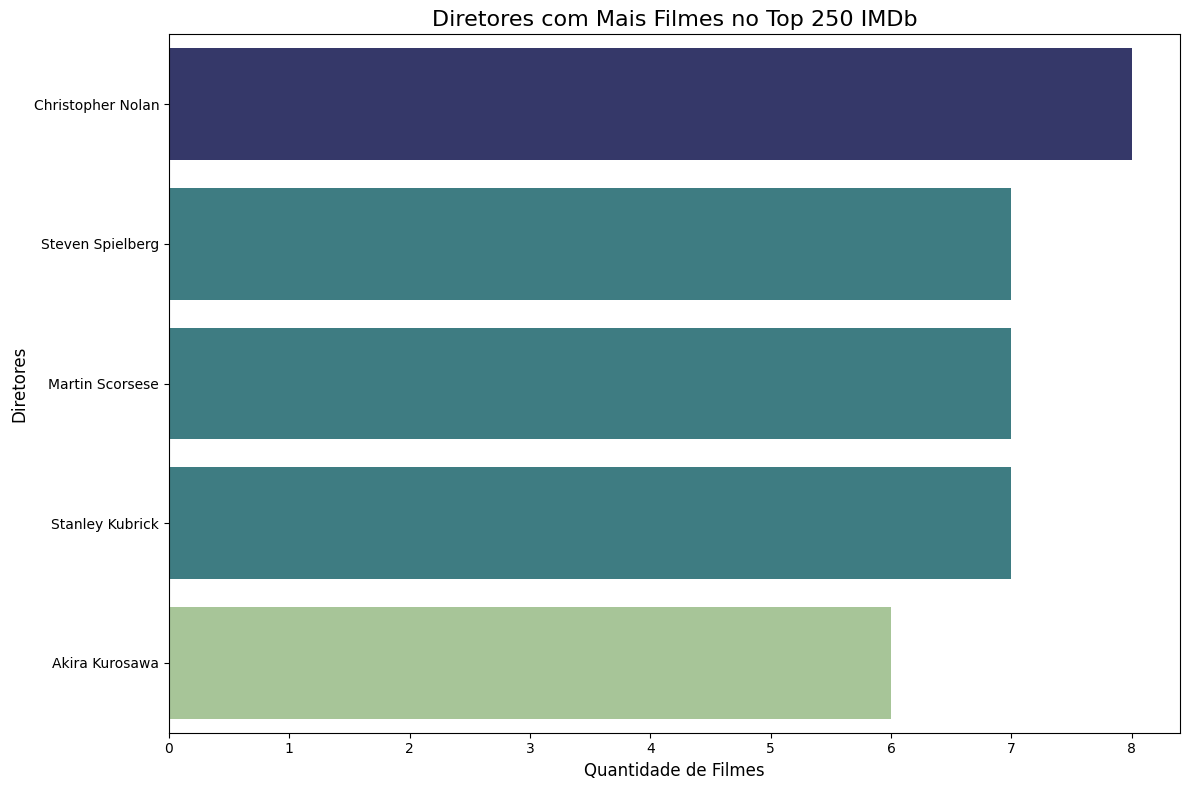

In [74]:
plt.figure(figsize=(12, 8))

grafico = sns.barplot(y=diretores_com_mais_filmes.index,
                      x=diretores_com_mais_filmes.values,
                      palette='crest',
                      orient='h',
                      hue= diretores_com_mais_filmes,
                      legend=False)

# Não é necessário adicionar rótulos, pois os valores são evidentes
# for container in grafico.containers:
#     grafico.bar_label(container, fmt='%d', padding=1)

plt.title('Diretores com Mais Filmes no Top 250 IMDb', fontsize=16)
plt.xlabel('Quantidade de Filmes', fontsize=12)
plt.ylabel('Diretores', fontsize=12)

plt.tight_layout()
plt.show()

In [48]:
df['nota'].mean()

np.float64(8.312400000000002)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Definindo "notas altas" como filmes com nota maior ou igual a 8.3 (média geral é ~8.3)
filmes_nota_alta = df[df['nota'] >= 8.3]

# Juntando todas as sinopses em um único texto
texto_sinopses = " ".join(filmes_nota_alta['sinopse'])

stop_words_pt = ['de', 'a','as', 'o', 'os', 'que', 'e', 'do', 'dos', 'da', 'das', 'em',
    'um', 'para', 'é', 'com', 'uma', 'os', 'no', 'se', 'na', 'por', 'sua', 'seu', 'seus']
# Usando CountVectorizer para contar as palavras, removendo "stop words" em português
vectorizer = CountVectorizer(stop_words=stop_words_pt, max_features=15)
X = vectorizer.fit_transform([texto_sinopses])

# Criando um DataFrame com as palavras e suas frequências
frequencia_palavras = pd.DataFrame({
    'Palavra': vectorizer.get_feature_names_out(),
    'Frequência': X.toarray()[0]
}).sort_values(by='Frequência', ascending=False)

print('Palavras mais comuns em sinopses de filmes com nota >= 8.3:')
print(frequencia_palavras)

Palavras mais comuns em sinopses de filmes com nota >= 8.3:
      Palavra  Frequência
12     quando          18
3      depois          16
14       vida          13
13      tenta          12
9      guerra          12
5         ele          12
2      contra          12
7    enquanto          11
8       filho          11
1        anos          11
4        dois          11
0       ajuda          10
6   encontrar           9
10      homem           9
11        mas           9


In [73]:
df['tamanho_sinopse_palavras'] = df['sinopse'].apply(lambda x: len(x.split()))
# print(df[['tamanho_sinopse_palavras', 'nota']])

correlacao = df['tamanho_sinopse_palavras'].corr(df['nota'])
print(f"Correlação entre o tamanho da sinopse e a nota do filme: {round(correlacao, 2)}")

if correlacao < 0.5:
    print("A correlação é fraca, indicando que o tamanho da sinopse não influencia significativamente a nota do filme.")
elif correlacao >= 0.5 and correlacao < 0.7:
    print("A correlação é moderada, sugerindo que há alguma influência do tamanho da sinopse na nota do filme.")
else:
    print("A correlação é forte, indicando que o tamanho da sinopse tem uma influência significativa na nota do filme.")

Correlação entre o tamanho da sinopse e a nota do filme: 0.05
A correlação é fraca, indicando que o tamanho da sinopse não influencia significativamente a nota do filme.
